<a id='intro'></a>
## Introduction

This Project aims to explore and investigate the Gun NCIS database. The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.

>The U.S. census data contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

> The NICS data contains the number of firearm checks by month, state, and type.


## Questions

- What census data is most associated with high gun per capita? 
- Are there any associative or correlational relationships between any Census data with high gun capita?
- What is the overall trend of gun purchases?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df1 = pd.read_csv('census-data.csv')
df2 = pd.read_excel('gun-data.xlsx')

In [3]:
df2.shape

(12485, 27)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
permit,12461.0,6413.629404,23752.338269,0.0,0.00,518.0,4272.00,522188.0
permit_recheck,1100.0,1165.956364,9224.200609,0.0,0.00,0.0,0.00,116681.0
handgun,12465.0,5940.881107,8618.584060,0.0,865.00,3059.0,7280.00,107224.0
long_gun,12466.0,7810.847585,9309.846140,0.0,2078.25,5122.0,10380.75,108058.0
other,5500.0,360.471636,1349.478273,0.0,17.00,121.0,354.00,77929.0
multiple,12485.0,268.603364,783.185073,0.0,15.00,125.0,301.00,38907.0
admin,12462.0,58.898090,604.814818,0.0,0.00,0.0,0.00,28083.0
prepawn_handgun,10542.0,4.828021,10.907756,0.0,0.00,0.0,5.00,164.0
prepawn_long_gun,10540.0,7.834156,16.468028,0.0,0.00,1.0,8.00,269.0
prepawn_other,5115.0,0.165591,1.057105,0.0,0.00,0.0,0.00,49.0


In [6]:
df2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
#sanity check for totals column
ddff = list(df2.iloc[0])
sum(ddff[2:][:-2])

32016.0

In [8]:
#checking for data duplicates
df2.duplicated().sum()

0

In [9]:
#checking for missing values
df2.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [10]:
#observations
#dtypes to be changed: month, day
#missing data points
# Nan values to refill or drop

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [12]:
df1.describe().T.head()

,count,unique,top,freq
Fact,80,80,"Population estimates, July 1, 2016, (V2016)",1
Fact Note,28,15,(c),6
Alabama,65,65,"4,863,300",1
Alaska,65,64,7.30%,2
Arizona,65,64,50.30%,2


In [13]:
df1.shape

(85, 52)

In [14]:
df1.duplicated().sum()

3

In [15]:
df1.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [16]:
#datatypes to fix : convert dataypes from strings to floats
#too many useless columns to take care of
#Nan values to refill or drop
#date will be converted from string to datetime


### DATA CLEANING

**Data Observations:**

For Both datasets, (gun data and census data) 
- we observe some features with wrong datatypes, which will be converted Convert data type from string to float for all the state column in Census data and from string to datetime in the gun data 

- Lots of missing and Nan data points were identified, In the cleaning phase, these will replaced with the mean values of the features in the gun data set

- we've also observed some redudant data in both datasets that will have to be removed, especially features and columns that will not be useful in our analysis

In [17]:
#import the datetime module and converting the months column into a datetime object
import datetime

df2.rename(columns={'month':'Months'},inplace=True)
df2.Months = pd.to_datetime(df2.Months)
df2.Months[0].year

2017

In [18]:
#filling in the missing data points with their column mean for the gun data
df2.fillna(df2.mean(),inplace=True)
df2.isnull().sum()

Months                       0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [19]:
#for sake of this analyis, will be making use of only population estimates for 2016, population census for 2010 and the median rent
#dropping off all other census columns.
df3 = df1.T
df4 = df3.rename({0:'Population estimates 2016',3:'Population census 2010',28:'Median gross rent'},axis=1)
df4 = df4[['Population estimates 2016','Population census 2010','Median gross rent']]
df4.drop(['Fact','Fact Note'],axis=0,inplace=True)

In [20]:
#changing the index
df4 = df4.reset_index()
df4.rename({'index': 'state'},axis='columns',inplace=True)
df4.head()

,state,Population estimates 2016,Population census 2010,Median gross rent
0,Alabama,"4,863,300","4,779,736",$717
1,Alaska,"741,894","710,231","$1,146"
2,Arizona,"6,931,071","6,392,017",$913
3,Arkansas,"2,988,248","2,915,918",$677
4,California,"39,250,017","37,253,956","$1,255"


In [21]:
#cleaning and changing the datatypes from string to float
#for population estimates 2016,2010 and the median gross rent
g,q,t = [],[],[]
for x in df4['Population estimates 2016']:
  g.append(''.join([n for n in x if n.isdigit()]))

df4['Population estimates 2016'] = g
df4['Population estimates 2016'] = df4['Population estimates 2016'].astype(int)

for x in df4['Median gross rent']:
  q.append(''.join([n for n in x if n.isdigit()]))
  
df4['Median gross rent'] = q
df4['Median gross rent'] = df4['Median gross rent'].astype(int)

for x in df4['Population census 2010']:
  t.append(''.join([n for n in x if n.isdigit()]))
  
df4['Population census 2010'] = t
df4['Population census 2010'] = df4['Population census 2010'].astype(int)

In [22]:
#dropped off redundant data columns for the gun dataset, only making use of the Months,state,permit and totals columns for the analysis
ddf2 = df2[['Months','state','permit','totals']]
ddf2.head()

,Months,state,permit,totals
0,2017-09-01,Alabama,16717.0,32019
1,2017-09-01,Alaska,209.0,6303
2,2017-09-01,Arizona,5069.0,28394
3,2017-09-01,Arkansas,2935.0,17747
4,2017-09-01,California,57839.0,123506


In [23]:
#merging the census dataframe and the gun dataframes into one clean dataframe 
#setting index to months

new_df = ddf2.merge(df4,on='state')
cleaned_df = new_df.set_index('Months')
cleaned_df.head()

,state,permit,totals,Population estimates 2016,Population census 2010,Median gross rent
Months,,,,,,
2017-09-01,Alabama,16717.0,32019,4863300,4779736,717
2017-08-01,Alabama,19733.0,35038,4863300,4779736,717
2017-07-01,Alabama,18042.0,31474,4863300,4779736,717
2017-06-01,Alabama,19508.0,35687,4863300,4779736,717
2017-05-01,Alabama,18538.0,33331,4863300,4779736,717


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 
- What census data is most associated with high gun per capita?

In [24]:
# Define a function to plot histogram plots
def histPlot(df, x_label, y_label, title, size):
    df.plot(kind='hist',figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)
    plt.show()

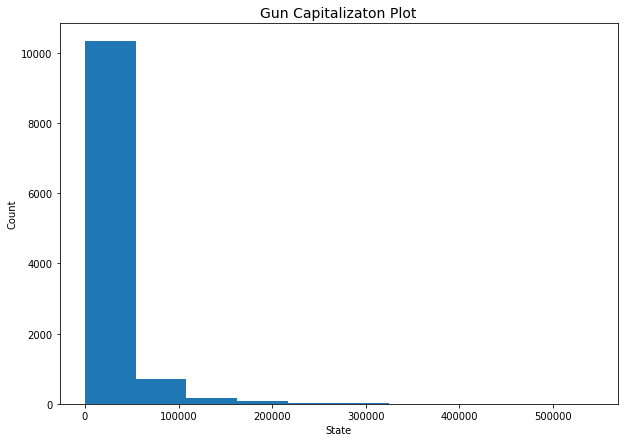

In [25]:
#plotting out the distribution of the totals feature
histPlot(cleaned_df.totals,'State','Count','Gun Capitalizaton Plot',(10,7))

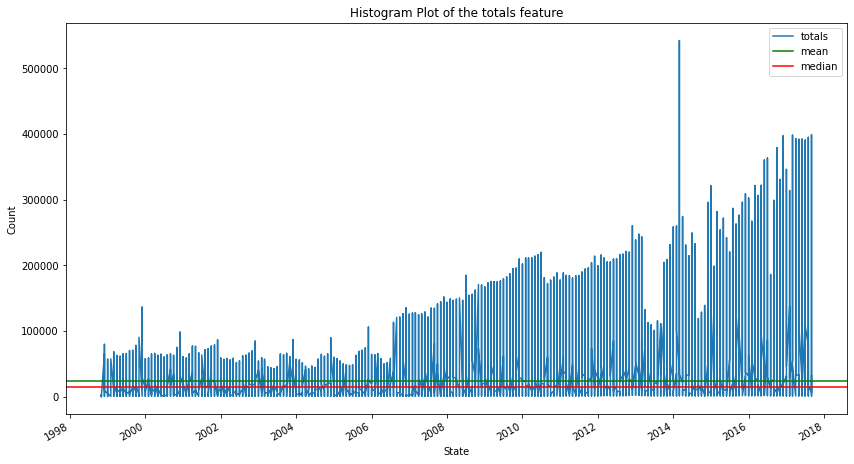

In [26]:
#visulaizing the totals feature
plt.figure(figsize=(14,8))
cleaned_df['totals'].plot()
plt.axhline(y=cleaned_df['totals'].mean(),label='mean',color='g')
plt.axhline(y=cleaned_df['totals'].median(),label='median',color='r')
plt.title('Histogram Plot of the totals feature')
plt.xlabel('State')
plt.ylabel('Count')

plt.legend()



Text(0, 0.5, 'Count')

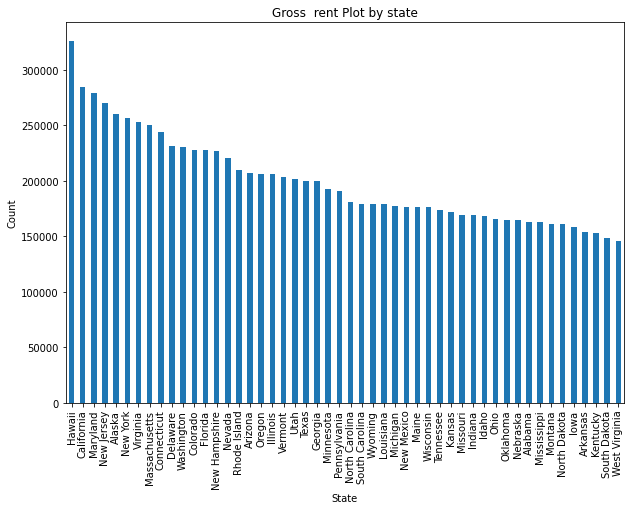

In [27]:
plt.figure(figsize=(10,7))
cleaned_df.groupby('state')['Median gross rent'].sum().sort_values(ascending=False).plot(kind='bar');
plt.title('Gross  rent Plot by state')
plt.xlabel('State')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

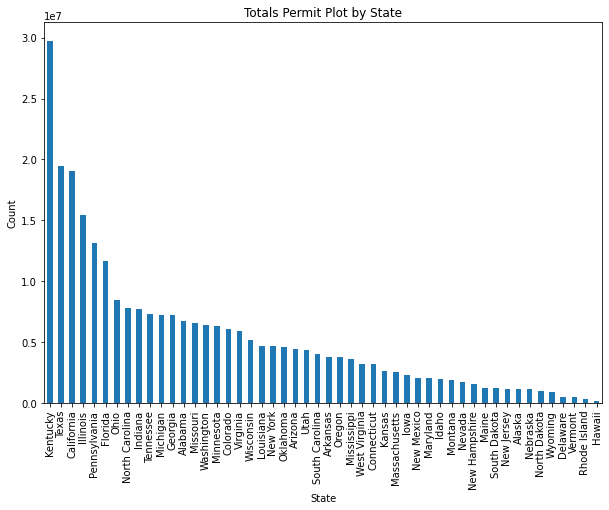

In [28]:
plt.figure(figsize=(10,7))
cleaned_df.groupby('state')['totals'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Totals Permit Plot by State')
plt.xlabel('State')
plt.ylabel('Count')


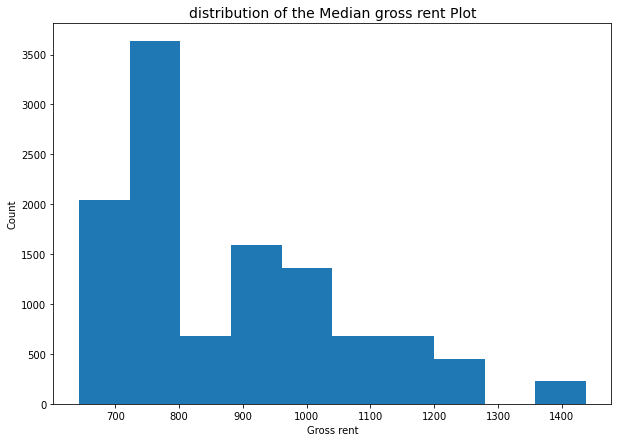

In [29]:
#plotting out the distribution of the Median gross rent feature
histPlot(cleaned_df['Median gross rent'],'Gross rent','Count','distribution of the Median gross rent Plot',(10,7))

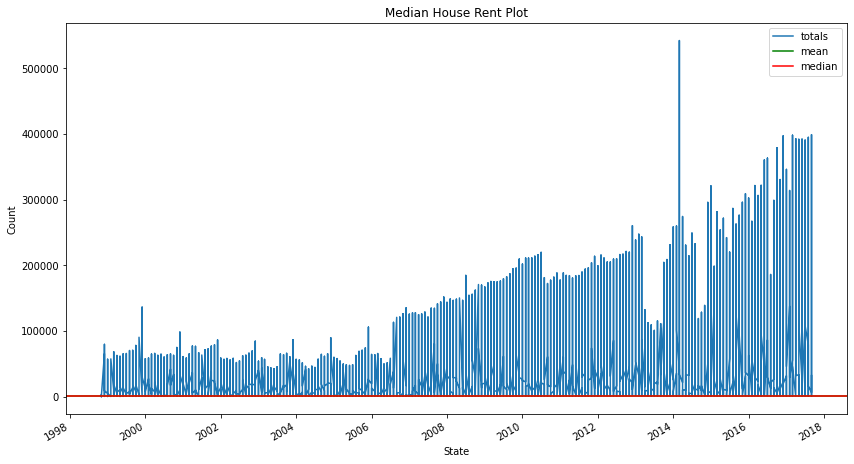

In [30]:
#visualizing the median gross rent accross the years
plt.figure(figsize=(14,8))
cleaned_df['totals'].plot();
plt.axhline(y=cleaned_df['Median gross rent'].mean(),label='mean',color='g')
plt.axhline(y=cleaned_df['Median gross rent'].median(),label='median',color='r')
plt.title('Median House Rent Plot')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()

In [31]:
#creating dataframes for 2016 and 2010 for easier analysis
df_2010=cleaned_df[cleaned_df.index.year == 2010]
df_2016=cleaned_df[cleaned_df.index.year == 2016]


In [32]:
df_2016.head()
#df_2010.head()


,state,permit,totals,Population estimates 2016,Population census 2010,Median gross rent
Months,,,,,,
2016-12-01,Alabama,26996.0,62014,4863300,4779736,717
2016-11-01,Alabama,22628.0,50477,4863300,4779736,717
2016-10-01,Alabama,22979.0,43251,4863300,4779736,717
2016-09-01,Alabama,22014.0,41336,4863300,4779736,717
2016-08-01,Alabama,22987.0,42455,4863300,4779736,717


In [33]:
#creating a gun capitalization column for both years of interest 2010, 2016
df_2010['gun_cap'] = df_2010['totals']/df_2010['Population census 2010']
df_2016['gun_cap'] = df_2016['totals']/df_2016['Population estimates 2016']

In [34]:
#Top 5 states per gun capitalization in 2010
df_2010.groupby('state')['gun_cap'].sum().sort_values(ascending=False).head()

state
Kentucky         0.549753
Utah             0.200129
Montana          0.102177
Alaska           0.092799
West Virginia    0.086104
Name: gun_cap, dtype: float64

Text(0, 0.5, 'Count')

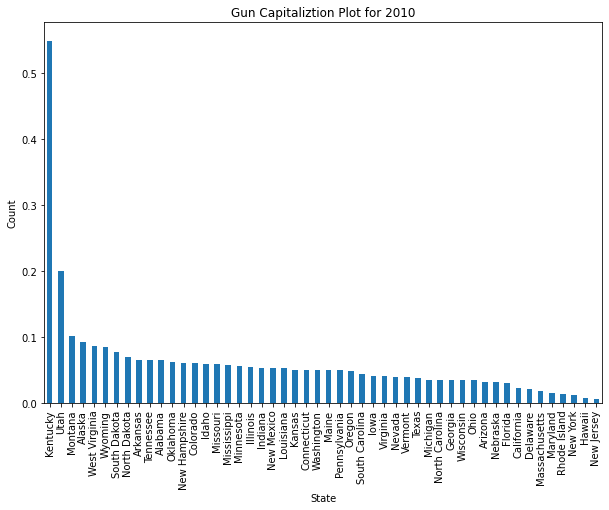

In [35]:
#Plot of the highest state per gun capital in 2010
plt.figure(figsize=(10,7))
df_2010.groupby('state')['gun_cap'].sum().sort_values(ascending=False).plot(kind='bar');
plt.title('Gun Capitaliztion Plot for 2010')
plt.xlabel('State')
plt.ylabel('Count')


In [36]:
#Top 5  the highest state per gun capital in 2016
df_2016.groupby('state')['gun_cap'].sum().sort_values(ascending=False).head()

state
Kentucky         0.828683
Indiana          0.216601
Illinois         0.150300
West Virginia    0.132352
Montana          0.130776
Name: gun_cap, dtype: float64

Text(0, 0.5, 'Count')

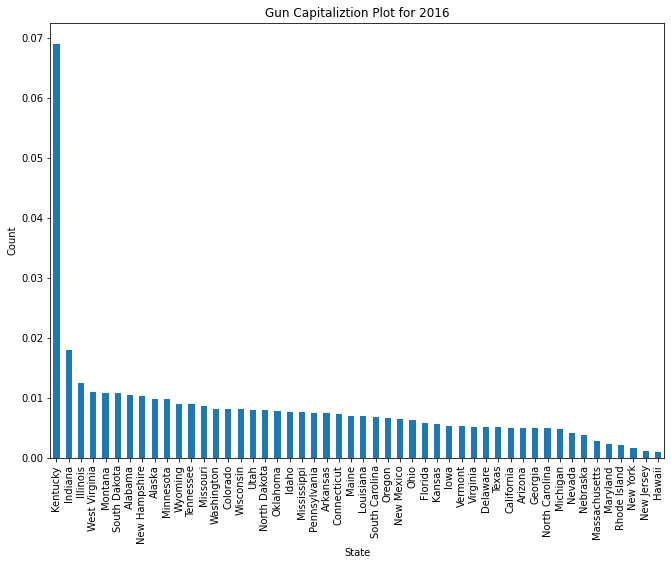

In [37]:
#gun capitalization in 2016, grouped by state plot
plt.figure(figsize=(11,8))
df_2016.groupby('state')['gun_cap'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Gun Capitaliztion Plot for 2016')
plt.xlabel('State')
plt.ylabel('Count')


In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2 

  Are there any associative or correlational relationships between any Census data with high gun capita?


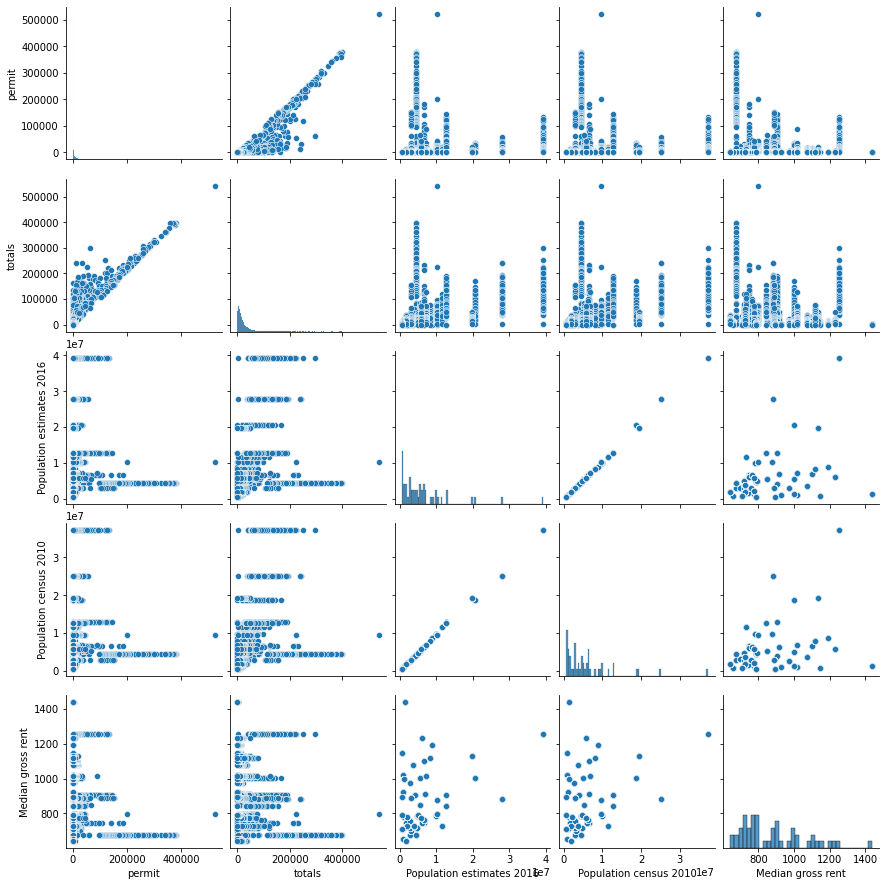

In [39]:
#plotting a multivariate distribution to explore relationships between features
import seaborn as sns

sns.pairplot(new_df);




### Research Question 3.

  What is the overall trend of gun purchases?


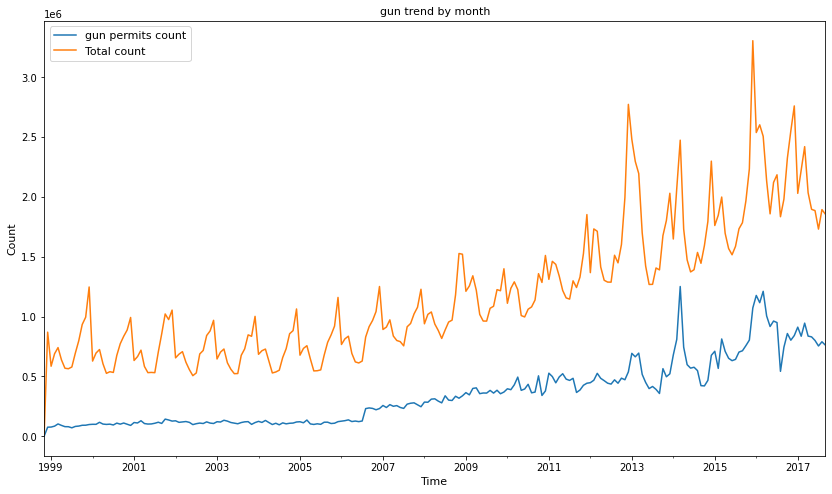

In [40]:
#Create line chart using grouped data by year, which can be used to observe the changed patten 
#in the dataset

plt.figure(figsize=(14,8))
cleaned_df.groupby(pd.Grouper(freq='M'))['permit'].sum().plot(kind='line',layout = (2, 1),label = 'gun permits count')
cleaned_df.groupby(pd.Grouper(freq='M'))['totals'].sum().plot(kind='line',layout = (3, 2),label = 'Total count')
plt.title('gun trend by month',fontsize = 11)
plt.xlabel('Time',fontsize = 11)
plt.ylabel('Count',fontsize = 11)
plt.legend(fontsize = 11)

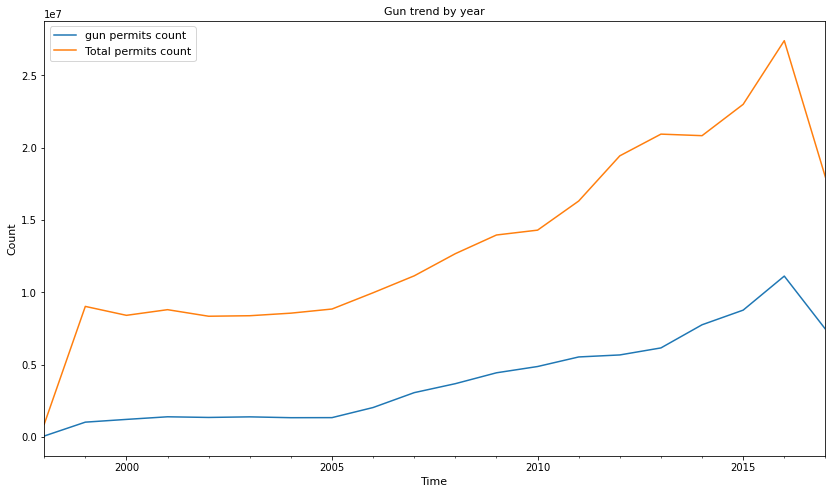

In [41]:
#
plt.figure(figsize=(14,8))
cleaned_df.groupby(pd.Grouper(freq='Y'))['permit'].sum().plot(kind='line',layout = (2, 1),label = 'gun permits count')
cleaned_df.groupby(pd.Grouper(freq='Y'))['totals'].sum().plot(kind='line',layout = (3, 2),label = 'Total permits count')
plt.title('Gun trend by year',fontsize = 11)
plt.xlabel('Time',fontsize = 11)
plt.ylabel('Count',fontsize = 11)
plt.legend(fontsize = 11)

<a id='conclusions'></a>
## Conclusions

- From our Investigations and Analysis we did observe a steady and postive trend in gun purchase over the years growth in the trend of gun purchasing,with a sudden spike in gun sales in 2015. we were also able to observe that Kentucky has the largest count of total gun sales, and from the week correlation plots, we can observe that the census data used in this analysis (population estimates 2016, population 2010, and median gross rent) shows very week correlation with our gun data.

## LImitations

- One major limitation in this workflow is the possible presence of outliers, which can alter the results of the analysis, specifically an area to watch out for will be the permit count for the state of kentucky

- Secondly in filling in the missing/NaN values, column means was used, for datasets that are not normally distributed, this may be a problem, hence there are other ways to fil in missing values that need to be explored

-

## Reference
- [Imsingla 2020,Github,Accessed July 17 2022](https://github.com/imsingla/Investigate-FBI-NCIS-Gun-Data/blob/master/investigate-a-dataset.ipynb)

- [Stackoverflow, Accessed 2022](https://stackoverflow.com)
-[Byron Dolon,Towardsdatascience, Accessed 2022](https://towardsdatascience.com/level-up-your-data-visualizations-with-trend-lines-in-python-6ad4a8253d6)